# Лабораторная работа №4
## Соляник Дмитрий 19-ИВТ-2
## Вариант №18


## Задание: 

Цель лабораторной работы – получение навыков работы с методами регрессии
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

Кодировка классификаторов:

1 – линейная регрессия без использования регуляризаторов;

2 – линейная регрессия, LASSO регуляризатор;

3 – линейная регрессия, RIDGE регуляризатор;


## 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [99]:
auto_mpg_df = pd.read_csv('auto-mpg.data.txt', sep='\s+', names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"])
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


1.	mpg - Расход топлива
2.	cylinders - Количество цилиндров 
3.	displacement - Вместимость топливного бака
4.	horsepower - Лошадиные силы
5.	weight - Вес
6.	acceleration - Акселератор(изменение частоты вращения валал двигателя)
7.	model year - Год выпуска
8.	origin - Происхождение
9.	car name - Название модели

## 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [100]:
print("Количество строк и столбцов до удаления строк с дубликатами, соответственно равны: ",auto_mpg_df.shape)
print("Количество строк и столбцов после удаления строк с дубликатамих, соответственно равны: ",auto_mpg_df.drop_duplicates().shape)

Количество строк и столбцов до удаления строк с дубликатами, соответственно равны:  (398, 9)
Количество строк и столбцов после удаления строк с дубликатамих, соответственно равны:  (398, 9)


## 3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [101]:
auto_mpg_df.info()
auto_mpg_df.horsepower = auto_mpg_df.horsepower.apply(lambda x: float(x) if x!='?' else None)
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float6

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


<AxesSubplot:>

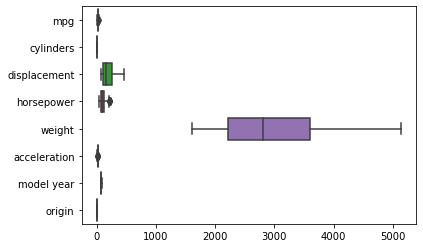

In [102]:
numerical_attributes = [column for column in auto_mpg_df.columns if auto_mpg_df[column].dtype.name != 'object']
print(numerical_attributes)
sns.boxplot(data = auto_mpg_df[numerical_attributes], orient = 'h')

<AxesSubplot:>

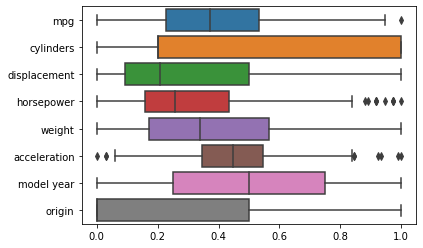

In [103]:
auto_mpg_df[numerical_attributes] = preprocessing.MinMaxScaler().fit_transform(auto_mpg_df[numerical_attributes].values.astype(float))#Масштабируем нормализацией 
sns.boxplot(data = auto_mpg_df[numerical_attributes], orient = 'h')

## 4) Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [104]:
categorical_attributes = [column for column in auto_mpg_df.columns if auto_mpg_df[column].dtype.name == 'object']
print(categorical_attributes)
auto_mpg_df = auto_mpg_df.drop(categorical_attributes, axis=1)

['car name']


## 5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

<AxesSubplot:>

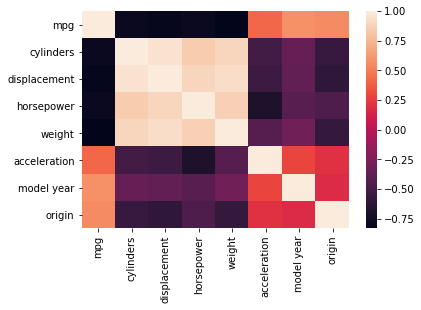

In [105]:
corr_matrix = auto_mpg_df.corr()
sns.heatmap(corr_matrix)

## 6) Заполните пропущенные значения в данных;

In [106]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
dtypes: float64(8)
memory usage: 25.0 KB


In [107]:
auto_mpg_df = auto_mpg_df.fillna(auto_mpg_df.mean())
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
dtypes: float64(8)
memory usage: 25.0 KB


## 7) Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [108]:
X = auto_mpg_df.drop(['mpg'], axis=1)
Y = auto_mpg_df['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## линейная регрессия без использования регуляризаторов

In [109]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
reg_pred = reg.predict(X_test)

print(reg_pred[:15] - Y_test[:15])

65    -0.026796
132   -0.025744
74    -0.033138
78    -0.000570
37    -0.015036
54    -0.141911
294   -0.026548
60     0.095480
12    -0.018853
341    0.081654
330   -0.213254
312   -0.090604
100    0.092381
59     0.097618
223    0.020390
Name: mpg, dtype: float64


In [110]:
Person, p_value_Person = pearsonr(reg_pred, Y_test)
Spirmen, p_value_Spirmen = spearmanr(reg_pred, Y_test)

print('Погшрешность:', mean_squared_error(reg_pred, Y_test))
print("Корреляция по Пирсону: ", Person)
print("Корреляция по Спирмену: ", Spirmen)
print("p_value :", p_value_Person)
print("p_value :", p_value_Spirmen)

Погшрешность: 0.008287470775225516
Корреляция по Пирсону:  0.9065037711281458
Корреляция по Спирмену:  0.9413245463146935
p_value : 5.221577709867067e-46
p_value : 1.6888732981594654e-57


## линейная регрессия, RIDGE регуляризатор

In [111]:
reg = Ridge()
reg_grid = GridSearchCV(reg, {'alpha': np.arange(0, 3, 0.005)})
reg_grid.fit(X_train, Y_train)
best_alpha = reg_grid.best_estimator_.alpha

reg = Ridge(alpha=best_alpha)
reg.fit(X_train, Y_train)
reg_pred = reg.predict(X_test)

print(reg_pred[:15] - Y_test[:15])

65    -0.027200
132   -0.025641
74    -0.027112
78     0.004624
37    -0.013395
54    -0.146700
294   -0.027234
60     0.091192
12    -0.026654
341    0.083537
330   -0.219115
312   -0.091976
100    0.087594
59     0.094454
223    0.023165
Name: mpg, dtype: float64


In [112]:
Person, p_value_Person = pearsonr(reg_pred, Y_test)
Spirmen, p_value_Spirmen = spearmanr(reg_pred, Y_test)

print('Погшрешность:', mean_squared_error(reg_pred, Y_test))
print("Корреляция по Пирсону: ", Person)
print("Корреляция по Спирмену: ", Spirmen)
print("p_value :", p_value_Person)
print("p_value :", p_value_Spirmen)

Погшрешность: 0.008309162697692276
Корреляция по Пирсону:  0.9063110754158721
Корреляция по Спирмену:  0.9421653000394236
p_value : 5.862160220935831e-46
p_value : 7.387560195932113e-58
